In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA,TruncatedSVD, NMF
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering
from kmodes.kmodes import KModes

from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk

from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

In [2]:
customers_data = pd.read_csv('/Users/fabiobisognin/Desktop/olist_customers_dataset.csv.zip')
order_items_data = pd.read_csv('/Users/fabiobisognin/Desktop/olist_order_items_dataset.csv.zip')
products_data = pd.read_csv('/Users/fabiobisognin/Desktop/olist_products_dataset.csv.zip')
translation_data = pd.read_csv('/Users/fabiobisognin/Desktop/product_category_name_translation.csv')
orders_data = pd.read_csv('/Users/fabiobisognin/Desktop/olist_orders_dataset.csv.zip')
trasaction_data= pd.read_csv('/Users/fabiobisognin/Desktop/olist_order_payments_dataset.csv.zip')
data_reviews= pd.read_csv('/Users/fabiobisognin/Desktop/olist_order_reviews_dataset.csv.zip')


CAMBIO NOMBRE DE CATEGORÍAS A INGLÉS

In [3]:
category_translations = dict(zip(translation_data['product_category_name'],translation_data['product_category_name_english']))
products_data = products_data.replace({'product_category_name':category_translations})


JUNTO LA DATA INCLUYENDO SOLO LO QUE NECESITO

In [4]:
category= products_data[['product_id', 'product_category_name']]

In [5]:

segment_data = pd.merge(customers_data, orders_data, on='customer_id', how='outer')
segment_data = pd.merge(segment_data, trasaction_data, on='order_id', how='outer')
segment_data = pd.merge(segment_data, order_items_data, on='order_id', how='outer')
segment_data = pd.merge(segment_data, data_reviews, on='order_id', how='outer')
data = pd.merge(segment_data, category, on='product_id', how='outer')




In [6]:
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017-11-23 00:47:18,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017-11-23 00:47:18,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,2017-05-22 22:22:56,124.99,15.62,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,2018-02-18 21:29:19,106.99,30.59,f7123bac5b91a0e2e38d8b41fd1206f4,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,sao paulo,SP,c8203bb57639618630affac9e8e923dd,delivered,2017-03-27 23:04:18,2017-03-27 23:23:38,2017-03-28 14:18:59,...,2017-04-02 23:23:38,19.99,10.96,f3642bae4843d919c4c53ec1ff8fe26d,4,NaN,NaN,2017-03-31 00:00:00,2017-04-04 01:37:20,pet_shop
119147,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,sao miguel do guama,PA,45b3000bcd10464ac178f32cd783fc83,delivered,2017-12-07 23:55:46,2017-12-09 23:50:32,2017-12-11 20:29:02,...,2017-12-13 23:50:32,250.00,54.11,6dfe34036fd1f79225daeaca9cf083c2,4,NaN,Tive um pouco de dificuldade pelo fato do núme...,2018-01-06 00:00:00,2018-01-07 14:33:35,health_beauty
119148,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,sao paulo,SP,49645a8902c1ba980836b7bff991d69f,delivered,2018-04-04 17:50:52,2018-04-04 18:08:41,2018-04-05 16:36:49,...,2018-04-10 18:08:41,84.90,7.46,260447daa5d738ced8f4e0bbee8a08a2,5,NaN,NaN,2018-04-07 00:00:00,2018-04-11 13:34:08,fashion_bags_accessories
119149,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,bom repouso,MG,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:09,2017-11-14 12:15:25,2017-11-27 20:44:47,...,2017-11-24 12:15:25,167.99,31.93,603f2873842a6975a43c54d305397d69,1,NaN,NaN,2017-12-14 00:00:00,2017-12-16 13:50:11,electronics


In [7]:
categ={'agro_industry_and_commerce':'outdoor',
       'air_conditioning':'car',
       'art':'home',
       'arts_and_craftmanship':'home',
       'audio':'car',
       'cat_auto':'car',
       'baby':'baby',
       'bed_bath_table':'home',
       'books_general_interest':'books',
       'books_imported':'books',
       'books_technical':'books',
       'cds_dvds_musicals':'electr',
       'christmas_supplies':'home',
       'cine_photo':'other',
       'computers':'computer',
       'computers_accessories':'computer',
       'consoles_games':'game',
       'construction_tools_construction':'outdoor',
       'construction_tools_lights':'outdoor',
       'construction_tools_safety':'outdoor',
       'cool_stuff':'cool',
       'costruction_tools_garden':'outdoor',
       'costruction_tools_tools':'outdoor',
       'diapers_and_hygiene':'health',
       'drinks':'food',
       'dvds_blu_ray':'electr',
       'electronics':'electr',
       'fashio_female_clothing':'apparel',
       'fashion_bags_accessories':'apparel',
       'fashion_childrens_clothes':'apparel',
       'fashion_male_clothing':'apparel',
       'fashion_shoes':'apparel',
       'fashion_sport':'sport',
       'fashion_underwear_beach':'apparel',
       'fixed_telephony':'home',
       'flowers':'home',
       'food':'food',
       'food_drink':'food',
       'furniture_bedroom':'home',
       'furniture_decor':'home',
       'furniture_living_room':'home',
       'furniture_mattress_and_upholstery':'home',
       'garden_tools':'home',
       'health_beauty':'health',
       'home_appliances':'home',
       'home_appliances_2':'home',
       'home_comfort_2':'home',
       'home_confort':'home',
       'home_construction':'home',
       'housewares':'home',
       'industry_commerce_and_business':'office',
       'kitchen_dining_laundry_garden_furniture':'home',
       'la_cuisine':'home',
       'luggage_accessories':'outdoor',
       'market_place':'other',
       'music':'other',
       'musical_instruments':'other',
       'office_furniture':'office',
       'party_supplies':'other',
       'pc_gamer':'computer',
       'perfumery':'health',
       'pet_shop':'other',
       'portateis_cozinha_e_preparadores_de_alimentos':'food',
       'security_and_services':'home',
       'signaling_and_security':'home',
       'small_appliances':'other',
       'small_appliances_home_oven_and_coffee':'home',
       'sports_leisure':'sport',
       'stationery':'office',
       'tablets_printing_image':'other',
       'telephony':'telephony',
       'toys':'baby',
       'watches_gifts':'gift'}

In [8]:

#data=df[['customer_unique_id','customer_state', 'payment_type']]


In [9]:
data=data.replace({'product_category_name': categ})
data=data.astype(str)
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4,nan,nan,2017-05-26 00:00:00,2017-05-30 22:34:40,office
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017-11-23 00:47:18,112.99,24.9,7fc63200f12eebb5f387856afdd63db8,1,nan,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,office
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017-11-23 00:47:18,112.99,24.9,7fc63200f12eebb5f387856afdd63db8,1,nan,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,office
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,2017-05-22 22:22:56,124.99,15.62,251191809e37c1cffc16865947c18a4d,3,nan,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,office
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,2018-02-18 21:29:19,106.99,30.59,f7123bac5b91a0e2e38d8b41fd1206f4,4,nan,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,office
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,sao paulo,SP,c8203bb57639618630affac9e8e923dd,delivered,2017-03-27 23:04:18,2017-03-27 23:23:38,2017-03-28 14:18:59,...,2017-04-02 23:23:38,19.99,10.96,f3642bae4843d919c4c53ec1ff8fe26d,4,nan,nan,2017-03-31 00:00:00,2017-04-04 01:37:20,other
119147,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,sao miguel do guama,PA,45b3000bcd10464ac178f32cd783fc83,delivered,2017-12-07 23:55:46,2017-12-09 23:50:32,2017-12-11 20:29:02,...,2017-12-13 23:50:32,250.0,54.11,6dfe34036fd1f79225daeaca9cf083c2,4,nan,Tive um pouco de dificuldade pelo fato do núme...,2018-01-06 00:00:00,2018-01-07 14:33:35,health
119148,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,sao paulo,SP,49645a8902c1ba980836b7bff991d69f,delivered,2018-04-04 17:50:52,2018-04-04 18:08:41,2018-04-05 16:36:49,...,2018-04-10 18:08:41,84.9,7.46,260447daa5d738ced8f4e0bbee8a08a2,5,nan,nan,2018-04-07 00:00:00,2018-04-11 13:34:08,apparel
119149,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,bom repouso,MG,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:09,2017-11-14 12:15:25,2017-11-27 20:44:47,...,2017-11-24 12:15:25,167.99,31.93,603f2873842a6975a43c54d305397d69,1,nan,nan,2017-12-14 00:00:00,2017-12-16 13:50:11,electr


In [10]:
score_data= data[['review_score', 'review_comment_message', 'product_category_name']]
score_data['review_score'] = score_data['review_score'].astype(str)


<ipython-input-10-7aee2c98d1b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_data['review_score'] = score_data['review_score'].astype(str)


In [11]:
score_data['review_comment_message'] = score_data['review_comment_message'].str.replace(r'[^\w\s]+', '')

<ipython-input-11-b19d236ecb85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_data['review_comment_message'] = score_data['review_comment_message'].str.replace(r'[^\w\s]+', '')


In [12]:
score_data['review_comment_message'] = score_data['review_comment_message'].str.lower()

<ipython-input-12-e82b9e5e50b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_data['review_comment_message'] = score_data['review_comment_message'].str.lower()


In [13]:
score_data
score_data = score_data[score_data['review_comment_message'].notna()]

In [14]:
score_data['review_score']=score_data['review_score'].str.replace('5', 'Positive')
score_data['review_score']=score_data['review_score'].str.replace('4', 'Positive')
score_data['review_score']=score_data['review_score'].str.replace('3', 'Neutral')
score_data['review_score']=score_data['review_score'].str.replace('2', 'Negative')
score_data['review_score']=score_data['review_score'].str.replace('1', 'Negative')


In [15]:
score_data.product_category_name.value_counts()

home         37032
health       13661
sport         9036
computer      8381
baby          7485
gift          6213
telephony     4726
office        4685
auto          4400
other         4033
cool          3999
outdoor       3235
electr        2932
apparel       2795
nan           2542
food          1222
game          1192
books          899
car            683
Name: product_category_name, dtype: int64

In [16]:
score_data = score_data.replace(np.nan, 'nan', regex=True)

In [17]:
def clean_word(data):
    words = " ".join(score_data['review_comment_message'])
    
    cleaned_words = " ".join([word for word in words.split() 
                             if 'http' not in word
                             and not word.startswith('@')
                             and not word.startswith('s')
                             and not word.startswith('#')
                             and word != 'RT'])
    return cleaned_words

In [18]:
home_=score_data[score_data['product_category_name']=='home']
health_=score_data[score_data['product_category_name']=='health']
sport_=score_data[score_data['product_category_name']=='sport']
computer_=score_data[score_data['product_category_name']=='computer']
baby_=score_data[score_data['product_category_name']=='baby']
gift_=score_data[score_data['product_category_name']=='gift']
telephony_=score_data[score_data['product_category_name']=='telephony']
office_=score_data[score_data['product_category_name']=='office']
auto_=score_data[score_data['product_category_name']=='auto']
other_=score_data[score_data['product_category_name']=='other']
cool_=score_data[score_data['product_category_name']=='cool']
outdoor_=score_data[score_data['product_category_name']=='outdoor']
electr_ =score_data[score_data['product_category_name']=='electr ']
apparel_=score_data[score_data['product_category_name']=='apparel']
food_=score_data[score_data['product_category_name']=='food']
game_=score_data[score_data['product_category_name']=='game']
books_=score_data[score_data['product_category_name']=='books']
car_=score_data[score_data['product_category_name']=='car']

In [19]:
home=clean_word(score_data[score_data['product_category_name']=='home'])
health=clean_word(score_data[score_data['product_category_name']=='health'])
sport=clean_word(score_data[score_data['product_category_name']=='sport'])
computer=clean_word(score_data[score_data['product_category_name']=='computer'])
baby=clean_word(score_data[score_data['product_category_name']=='baby'])


In [20]:
gift=clean_word(score_data[score_data['product_category_name']=='gift']['review_comment_message'])
telephony=clean_word(score_data[score_data['product_category_name']=='telephony']['review_comment_message'])


In [21]:
office=clean_word(score_data[score_data['product_category_name']=='office']['review_comment_message'])
auto=clean_word(score_data[score_data['product_category_name']=='auto']['review_comment_message'])
other=clean_word(score_data[score_data['product_category_name']=='other']['review_comment_message'])

In [22]:
cool=clean_word(score_data[score_data['product_category_name']=='cool']['review_comment_message'])
outdoor=clean_word(score_data[score_data['product_category_name']=='outdoor']['review_comment_message'])
electr =clean_word(score_data[score_data['product_category_name']=='electr ']['review_comment_message'])

In [23]:
apparel=clean_word(score_data[score_data['product_category_name']=='apparel']['review_comment_message'])
food=clean_word(score_data[score_data['product_category_name']=='food']['review_comment_message'])
game=clean_word(score_data[score_data['product_category_name']=='game']['review_comment_message'])
books=clean_word(score_data[score_data['product_category_name']=='books']['review_comment_message'])
car=clean_word(score_data[score_data['product_category_name']=='car']['review_comment_message'])

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
pt_stp_words = stopwords.words('portuguese')

In [32]:
stop_words=['veio', 'chegou', 'nao', 'entregue', 'gostei', 'prazo', 'qualidade', 'pedido', 'problema', 'parabén', 'contato', 'entrega', 'comprar', 'produto', 'parabéns', 'vendedor',  'unidade', 'rápida', 'esperava', 'loja', 'recomendo', 'recebi', 'comprei', 'nan','a', 'à', 'adeus', 'agora', 'aí', 'ainda', 'além', 'algo', 'alguém', 'algum', 'alguma', 'algumas', 'alguns', 'ali', 'ampla', 'amplas', 'amplo', 'amplos', 'ano', 'anos', 'ante', 'antes', 'ao', 'aos', 'apenas', 'apoio', 'após', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', 'área', 'as', 'às', 'assim', 'até', 'atrás', 'através', 'baixo', 'bastante', 'bem', 'boa', 'boas', 'bom', 'bons', 'breve', 'cá', 'cada', 'catorze', 'cedo', 'cento', 'certamente', 'certeza', 'cima', 'cinco', 'coisa', 'coisas', 'com', 'como', 'conselho', 'contra', 'contudo', 'custa', 'da', 'dá', 'dão', 'daquela', 'daquelas', 'daquele', 'daqueles', 'dar', 'das', 'de', 'debaixo', 'dela', 'delas', 'dele', 'deles', 'demais', 'dentro', 'depois', 'desde', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'deve', 'devem', 'devendo', 'dever', 'deverá', 'deverão', 'deveria', 'deveriam', 'devia', 'deviam', 'dez', 'dezanove', 'dezasseis', 'dezassete', 'dezoito', 'dia', 'diante', 'disse', 'disso', 'disto', 'dito', 'diz', 'dizem', 'dizer', 'do', 'dois', 'dos', 'doze', 'duas', 'dúvida', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'embora', 'enquanto', 'entre', 'era', 'eram', 'éramos', 'és', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estás', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estiveste', 'estivestes', 'estou', 'etc', 'eu', 'exemplo', 'faço', 'falta', 'favor', 'faz', 'fazeis', 'fazem', 'fazemos', 'fazendo', 'fazer', 'fazes', 'feita', 'feitas', 'feito', 'feitos', 'fez', 'fim', 'final', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'forma', 'formos', 'fosse', 'fossem', 'fôssemos', 'foste', 'fostes', 'fui', 'geral', 'grande', 'grandes', 'grupo', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'havia', 'hei', 'hoje', 'hora', 'horas', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvéssemos', 'isso', 'isto', 'já', 'la', 'lá', 'lado', 'lhe', 'lhes', 'lo', 'local', 'logo', 'longe', 'lugar', 'maior', 'maioria', 'mais', 'mal', 'mas', 'máximo', 'me', 'meio', 'menor', 'menos', 'mês', 'meses', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus', 'mil', 'minha', 'minhas', 'momento', 'muita', 'muitas', 'muito', 'muitos', 'na', 'nada', 'não', 'naquela', 'naquelas', 'naquele', 'naqueles', 'nas', 'nem', 'nenhum', 'nenhuma', 'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes', 'ninguém', 'nível', 'no', 'noite', 'nome', 'nos', 'nós',
            'nossa', 'nossas', 'nosso', 'nossos', 'nova', 'novas', 'nove', 'novo', 'novos', 'num', 'numa', 'número', 'nunca', 'o', 'obra', 'obrigada', 'obrigado', 'oitava', 'oitavo', 'oito', 'onde', 'ontem', 'onze', 'os', 'ou', 'outra', 'outras', 'outro', 'outros', 'para', 'parece', 'parte', 'partir', 'paucas', 'pela', 'pelas', 'pelo', 'pelos', 'pequena', 'pequenas', 'pequeno', 'pequenos', 'per', 'perante', 'perto', 'pode', 'pude', 'pôde', 'podem', 'podendo', 'poder', 'poderia', 'poderiam', 'podia', 'podiam', 'põe', 'põem', 'pois', 'ponto', 'pontos', 'por', 'porém', 'porque', 'porquê', 'posição', 'possível', 'possivelmente', 'posso', 'pouca', 'poucas', 'pouco', 'poucos', 'primeira', 'primeiras', 'primeiro', 'primeiros', 'própria', 'próprias', 'próprio', 'próprios', 'próxima', 'próximas', 'próximo', 'próximos', 'pude', 'puderam', 'quais', 'quáis', 'qual', 'quando', 'quanto', 'quantos', 'quarta', 'quarto', 'quatro', 'que', 'quê', 'quem', 'quer', 'quereis', 'querem', 'queremas', 'queres', 'quero', 'questão', 'quinta', 'quinto', 'quinze', 'relação', 'sabe', 'sabem', 'são', 'se', 'segunda', 'segundo', 'sei', 'seis', 'seja', 'sejam', 'sejamos', 'sem', 'sempre', 'sendo', 'ser', 'será', 'serão', 'serei', 'seremos', 'seria', 'seriam', 'seríamos', 'sete', 'sétima', 'sétimo', 'seu', 'seus', 'sexta', 'sexto', 'si', 'sido', 'sim', 'sistema', 'só', 'sob', 'sobre', 'sois', 'somos', 'sou', 'sua', 'suas', 'tal', 'talvez', 'também', 'tampouco', 'tanta', 'tantas', 'tanto', 'tão', 'tarde', 'te', 'tem', 'tém', 'têm', 'temos', 'tendes', 'tendo', 'tenha', 'tenham', 'tenhamos', 'tenho', 'tens', 'ter', 'terá', 'terão', 'terceira', 'terceiro', 'terei', 'teremos', 'teria', 'teriam', 'teríamos', 'teu', 'teus', 'teve', 'ti', 'tido', 'tinha', 'tinham', 'tínhamos', 'tive', 'tivemos', 'tiver', 'tivera', 'tiveram', 'tivéramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivéssemos', 'tiveste', 'tivestes', 'toda', 'todas', 'todavia', 'todo', 'todos', 'trabalho', 'três', 'treze', 'tu', 'tua', 'tuas', 'tudo', 'última', 'últimas', 'último', 'últimos', 'um', 'uma', 'umas', 'uns', 'vai', 'vais', 'vão', 'vários', 'vem', 'vêm', 'vendo', 'vens', 'ver', 'vez', 'vezes', 'viagem', 'vindo', 'vinte', 'vir', 'você', 'vocês', 'vos', 'vós', 'vossa', 'vossas', 'vosso', 'vossos', 'zero', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '_' ]

In [33]:
def wcloud(cleaned_words):
    wordcloud = WordCloud(stopwords=stop_words,
                         background_color='black',
                         width=3000,
                          height=2500
                         ).generate(cleaned_words)
    return wordcloud

In [34]:
home_w=wcloud(home)

home


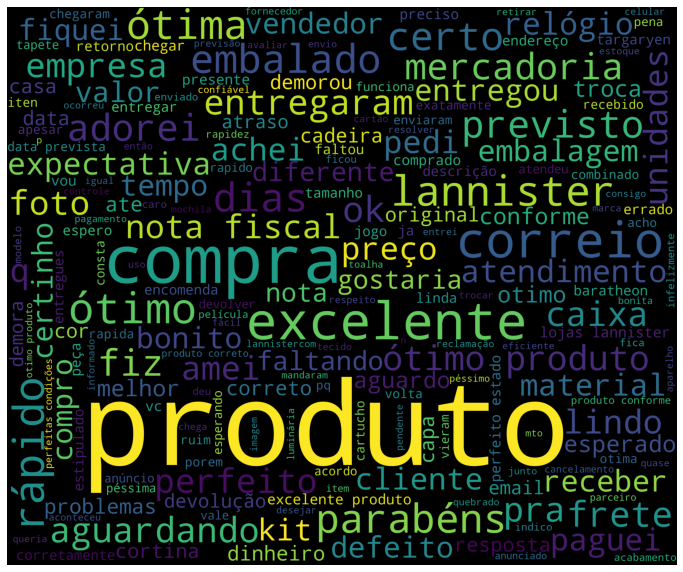

In [35]:
print('home')

plt.figure(1,figsize=(12,12))
plt.imshow(home_w)
plt.axis('off')
plt.show()

In [29]:
computer_w=wcloud(computer)

computer


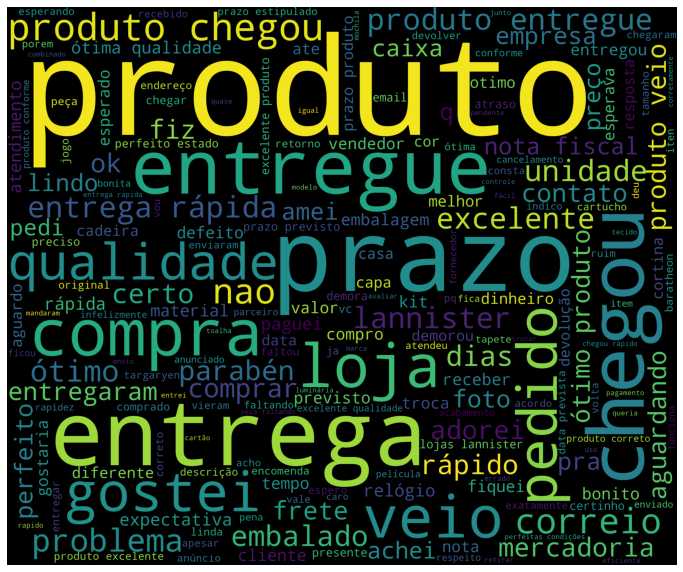

In [30]:
print('computer')

plt.figure(1,figsize=(12,12))
plt.imshow(computer_w)
plt.axis('off')
plt.show()

In [31]:
home_w=wcloud(home)
health_w=wcloud(health)
sport_w=wcloud(sport)
computer_w=wcloud(computer)
baby_w=wcloud(computer)
gift_w=wcloud(gift)
telephony_w=wcloud(telephony)
office_w=wcloud(office)
auto_w=wcloud(auto)
other_w=wcloud(auto)
cool_w=wcloud(auto)
outdoor_w=wcloud(outdoor)
electr_w =wcloud(electr)
apparel_w=wcloud(apparel)
food_w=wcloud(food)
game_w=wcloud(game)
books_w=wcloud(books)
car_w=wcloud(car)